### Objective
This notebook performs feature engineering of defensive play, analyzes hypothses about top defensive players and makes obersvations & insights about the data.

In [1]:
# Dependencies
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Set plot styles for better visuals
sns.set(style="whitegrid")

# Base path for cleaned data
base_cleaned_path = '../data/cleaned/'

# Load the cleaned data
defenders_df = pd.read_csv(os.path.join(base_cleaned_path, 'defender/defender_cleaned.csv'))
player_reference_df = pd.read_csv('../data/raw/player_reference.csv')

# Check the current column names in defenders_df before any operation
print("Initial columns in defenders_df:", defenders_df.columns)

# Ensure 'element_code' column is present for merging
if 'element_code' not in defenders_df.columns:
    if 'element_code_defender' in defenders_df.columns:
        defenders_df.rename(columns={'element_code_defender': 'element_code'}, inplace=True)
    else:
        raise KeyError("Expected column 'element_code' or 'element_code_defender' not found in defenders_df")

# Merge with player reference data to add names
if 'element_code' in defenders_df.columns and 'element_code' in player_reference_df.columns:
    defenders_df = defenders_df.merge(
        player_reference_df,
        on='element_code',
        how='left',
        suffixes=('_defender', '_ref')
    )
    print("Merge completed. Columns in defenders_df:", defenders_df.columns)
else:
    raise KeyError("Required 'element_code' column not found for merging.")

# Handle missing names by filling with 'Unknown'
defenders_df['first_name_ref'].fillna('Unknown', inplace=True)
defenders_df['second_name_ref'].fillna('Unknown', inplace=True)

# Display the first few rows of the defenders DataFrame
print(defenders_df.head())


Initial columns in defenders_df: Index(['season_name', 'element_code', 'start_cost', 'end_cost', 'total_points',
       'minutes', 'goals_scored', 'assists', 'clean_sheets', 'goals_conceded',
       'own_goals', 'penalties_saved', 'penalties_missed', 'yellow_cards',
       'red_cards', 'saves', 'bonus', 'bps', 'influence', 'creativity',
       'threat', 'ict_index', 'starts', 'expected_goals', 'expected_assists',
       'expected_goal_involvements', 'expected_goals_conceded', 'id',
       'first_name', 'second_name', 'unique_id'],
      dtype='object')
Merge completed. Columns in defenders_df: Index(['season_name', 'element_code', 'start_cost', 'end_cost', 'total_points',
       'minutes', 'goals_scored', 'assists', 'clean_sheets', 'goals_conceded',
       'own_goals', 'penalties_saved', 'penalties_missed', 'yellow_cards',
       'red_cards', 'saves', 'bonus', 'bps', 'influence', 'creativity',
       'threat', 'ict_index', 'starts', 'expected_goals', 'expected_assists',
       'expecte

/var/folders/h3/xtqxxtn9551c8dd44chd8lbc0000gn/T/ipykernel_1490/3984794119.py:34: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  defenders_df['first_name_ref'].fillna('Unknown', inplace=True)
/var/folders/h3/xtqxxtn9551c8dd44chd8lbc0000gn/T/ipykernel_1490/3984794119.py:35: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setti

## Data Inspection

In [3]:
# Data Inspection for missing values and that the data types are correct
defenders_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 818 entries, 0 to 817
Data columns (total 34 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   season_name                 818 non-null    object 
 1   element_code                818 non-null    int64  
 2   start_cost                  818 non-null    int64  
 3   end_cost                    818 non-null    int64  
 4   total_points                818 non-null    int64  
 5   minutes                     818 non-null    int64  
 6   goals_scored                818 non-null    int64  
 7   assists                     818 non-null    int64  
 8   clean_sheets                818 non-null    int64  
 9   goals_conceded              818 non-null    int64  
 10  own_goals                   818 non-null    int64  
 11  penalties_saved             818 non-null    int64  
 12  penalties_missed            818 non-null    int64  
 13  yellow_cards                818 non

## Feature Engineering

In [4]:
# Check if there are players with zero minutes to avoid division by zero
defenders_df = defenders_df[defenders_df['minutes'] > 0]

Per-90 Metrics:
Since players may have different playing times, normalizing metrics on a per-90-minutes basis is crucial for fair comparisons. This normalization can help account for varying amounts of playing time among different players.

In [5]:
# Calculate per-90 metrics for defenders
defenders_df['goals_conceded_per_90'] = (defenders_df['goals_conceded'] / defenders_df['minutes']) * 90
defenders_df['goals_scored_per_90'] = (defenders_df['goals_scored'] / defenders_df['minutes']) * 90
defenders_df['assists_per_90'] = (defenders_df['assists'] / defenders_df['minutes']) * 90
defenders_df['clean_sheets_per_90'] = (defenders_df['clean_sheets'] / defenders_df['minutes']) * 90

defenders_df.head()

,season_name,element_code,start_cost,end_cost,total_points,minutes,goals_scored,assists,clean_sheets,goals_conceded,...,first_name_defender,second_name_defender,unique_id,id_ref,first_name_ref,second_name_ref,goals_conceded_per_90,goals_scored_per_90,assists_per_90,clean_sheets_per_90
0,2019/20,244619,40,40,15,267,0,1,1,4,...,Luke,Thomas,244619_2019/20,305,Luke,Thomas,1.348315,0.000000,0.337079,0.337079
1,2020/21,244619,45,41,26,968,1,0,1,18,...,Luke,Thomas,244619_2020/21,305,Luke,Thomas,1.673554,0.092975,0.000000,0.092975
2,2021/22,244619,45,43,50,1911,0,1,5,35,...,Luke,Thomas,244619_2021/22,305,Luke,Thomas,1.648352,0.000000,0.047096,0.235479
3,2022/23,244619,45,39,28,1068,0,1,2,20,...,Luke,Thomas,244619_2022/23,305,Luke,Thomas,1.685393,0.000000,0.084270,0.168539
4,2023/24,244619,40,40,7,916,0,0,0,29,...,Luke,Thomas,244619_2023/24,305,Luke,Thomas,2.849345,0.000000,0.000000,0.000000


Composite Metrics:
Metrics that combine various aspects of a player's performance. For example, a composite defensive_effectiveness score could be created using metrics like clean sheets, goals conceded, tackles, and blocks.

In [6]:
# Create a composite defensive effectiveness score
defenders_df['defensive_effectiveness'] = (
    defenders_df['clean_sheets_per_90'] * 0.4 -
    defenders_df['goals_conceded_per_90'] * 0.4 +
    defenders_df['bps'] * 0.2  # Using the Bonus Points System as a proxy for overall contribution
)

defenders_df.head()

,season_name,element_code,start_cost,end_cost,total_points,minutes,goals_scored,assists,clean_sheets,goals_conceded,...,second_name_defender,unique_id,id_ref,first_name_ref,second_name_ref,goals_conceded_per_90,goals_scored_per_90,assists_per_90,clean_sheets_per_90,defensive_effectiveness
0,2019/20,244619,40,40,15,267,0,1,1,4,...,Thomas,244619_2019/20,305,Luke,Thomas,1.348315,0.000000,0.337079,0.337079,13.595506
1,2020/21,244619,45,41,26,968,1,0,1,18,...,Thomas,244619_2020/21,305,Luke,Thomas,1.673554,0.092975,0.000000,0.092975,25.767769
2,2021/22,244619,45,43,50,1911,0,1,5,35,...,Thomas,244619_2021/22,305,Luke,Thomas,1.648352,0.000000,0.047096,0.235479,69.234851
3,2022/23,244619,45,39,28,1068,0,1,2,20,...,Thomas,244619_2022/23,305,Luke,Thomas,1.685393,0.000000,0.084270,0.168539,37.193258
4,2023/24,244619,40,40,7,916,0,0,0,29,...,Thomas,244619_2023/24,305,Luke,Thomas,2.849345,0.000000,0.000000,0.000000,14.860262


Expected Metrics:
Utilize expected goals, assists, and goal involvements to gauge the offensive potential of defenders

In [7]:
# Expected contributions per 90 minutes
defenders_df['expected_goals_per_90'] = (defenders_df['expected_goals'] / defenders_df['minutes']) * 90
defenders_df['expected_assists_per_90'] = (defenders_df['expected_assists'] / defenders_df['minutes']) * 90

defenders_df.head()

,season_name,element_code,start_cost,end_cost,total_points,minutes,goals_scored,assists,clean_sheets,goals_conceded,...,id_ref,first_name_ref,second_name_ref,goals_conceded_per_90,goals_scored_per_90,assists_per_90,clean_sheets_per_90,defensive_effectiveness,expected_goals_per_90,expected_assists_per_90
0,2019/20,244619,40,40,15,267,0,1,1,4,...,305,Luke,Thomas,1.348315,0.000000,0.337079,0.337079,13.595506,0.000000,0.000000
1,2020/21,244619,45,41,26,968,1,0,1,18,...,305,Luke,Thomas,1.673554,0.092975,0.000000,0.092975,25.767769,0.000000,0.000000
2,2021/22,244619,45,43,50,1911,0,1,5,35,...,305,Luke,Thomas,1.648352,0.000000,0.047096,0.235479,69.234851,0.000000,0.000000
3,2022/23,244619,45,39,28,1068,0,1,2,20,...,305,Luke,Thomas,1.685393,0.000000,0.084270,0.168539,37.193258,0.007584,0.040449
4,2023/24,244619,40,40,7,916,0,0,0,29,...,305,Luke,Thomas,2.849345,0.000000,0.000000,0.000000,14.860262,0.052074,0.017686


ICT Index Analysis:
The ICT (Influence, Creativity, Threat) index provides a composite measure of a player's overall contribution. These metrics can drive insights into a defender's potential impact.

In [8]:
# ICT Index per 90 minutes
defenders_df['ict_index_per_90'] = (defenders_df['ict_index'] / defenders_df['minutes']) * 90

defenders_df.head()

,season_name,element_code,start_cost,end_cost,total_points,minutes,goals_scored,assists,clean_sheets,goals_conceded,...,first_name_ref,second_name_ref,goals_conceded_per_90,goals_scored_per_90,assists_per_90,clean_sheets_per_90,defensive_effectiveness,expected_goals_per_90,expected_assists_per_90,ict_index_per_90
0,2019/20,244619,40,40,15,267,0,1,1,4,...,Luke,Thomas,1.348315,0.000000,0.337079,0.337079,13.595506,0.000000,0.000000,8.056180
1,2020/21,244619,45,41,26,968,1,0,1,18,...,Luke,Thomas,1.673554,0.092975,0.000000,0.092975,25.767769,0.000000,0.000000,3.542355
2,2021/22,244619,45,43,50,1911,0,1,5,35,...,Luke,Thomas,1.648352,0.000000,0.047096,0.235479,69.234851,0.000000,0.000000,3.136578
3,2022/23,244619,45,39,28,1068,0,1,2,20,...,Luke,Thomas,1.685393,0.000000,0.084270,0.168539,37.193258,0.007584,0.040449,2.342697
4,2023/24,244619,40,40,7,916,0,0,0,29,...,Luke,Thomas,2.849345,0.000000,0.000000,0.000000,14.860262,0.052074,0.017686,2.426856


Expected vs Actual Goals Conceded

In [9]:
# Discrepancy between expected and actual goals conceded
defenders_df['discrepancy_expected_actual_goals'] = (
    defenders_df['expected_goals_conceded'] - defenders_df['goals_conceded']
)

defenders_df.head()

,season_name,element_code,start_cost,end_cost,total_points,minutes,goals_scored,assists,clean_sheets,goals_conceded,...,second_name_ref,goals_conceded_per_90,goals_scored_per_90,assists_per_90,clean_sheets_per_90,defensive_effectiveness,expected_goals_per_90,expected_assists_per_90,ict_index_per_90,discrepancy_expected_actual_goals
0,2019/20,244619,40,40,15,267,0,1,1,4,...,Thomas,1.348315,0.000000,0.337079,0.337079,13.595506,0.000000,0.000000,8.056180,-4.00
1,2020/21,244619,45,41,26,968,1,0,1,18,...,Thomas,1.673554,0.092975,0.000000,0.092975,25.767769,0.000000,0.000000,3.542355,-18.00
2,2021/22,244619,45,43,50,1911,0,1,5,35,...,Thomas,1.648352,0.000000,0.047096,0.235479,69.234851,0.000000,0.000000,3.136578,-35.00
3,2022/23,244619,45,39,28,1068,0,1,2,20,...,Thomas,1.685393,0.000000,0.084270,0.168539,37.193258,0.007584,0.040449,2.342697,3.11
4,2023/24,244619,40,40,7,916,0,0,0,29,...,Thomas,2.849345,0.000000,0.000000,0.000000,14.860262,0.052074,0.017686,2.426856,-7.30


Rolling Averages: Show trends (moving average of last 5 games)

In [10]:
# Sorting by 'element_code' and 'season_name' to maintain chronological order
defenders_df.sort_values(by=['element_code', 'season_name'], inplace=True)

# Calculate rolling averages for recent performance over the last 5 matches
defenders_df['goals_conceded_rolling_5'] = defenders_df.groupby('element_code')['goals_conceded'].rolling(window=5, min_periods=1).mean().reset_index(level=0, drop=True)
defenders_df['clean_sheets_rolling_5'] = defenders_df.groupby('element_code')['clean_sheets'].rolling(window=5, min_periods=1).mean().reset_index(level=0, drop=True)
defenders_df['yellow_cards_rolling_5'] = defenders_df.groupby('element_code')['yellow_cards'].rolling(window=5, min_periods=1).mean().reset_index(level=0, drop=True)
defenders_df['red_cards_rolling_5'] = defenders_df.groupby('element_code')['red_cards'].rolling(window=5, min_periods=1).mean().reset_index(level=0, drop=True)
defenders_df['defensive_effectiveness_rolling_5'] = (defenders_df.groupby('element_code')['defensive_effectiveness'].transform(lambda x: x.rolling(window=5, min_periods=1).mean()))

defenders_df.head()

,season_name,element_code,start_cost,end_cost,total_points,minutes,goals_scored,assists,clean_sheets,goals_conceded,...,defensive_effectiveness,expected_goals_per_90,expected_assists_per_90,ict_index_per_90,discrepancy_expected_actual_goals,goals_conceded_rolling_5,clean_sheets_rolling_5,yellow_cards_rolling_5,red_cards_rolling_5,defensive_effectiveness_rolling_5
591,2016/17,17761,40,40,23,568,0,0,1,11,...,21.566197,0.0,0.0,4.357394,-11.0,11.000000,1.000000,1.000000,0.0,21.566197
592,2017/18,17761,45,46,101,2790,0,1,11,30,...,107.554839,0.0,0.0,3.800000,-30.0,20.500000,6.000000,3.000000,0.0,64.560518
593,2018/19,17761,50,47,97,3086,3,2,7,63,...,104.146727,0.0,0.0,4.505833,-63.0,34.666667,6.333333,4.666667,0.0,77.755921
594,2019/20,17761,50,55,143,3420,2,3,15,50,...,137.631579,0.0,0.0,3.944737,-50.0,38.500000,8.500000,6.000000,0.0,92.724835
595,2020/21,17761,55,53,109,3240,1,0,11,50,...,106.366667,0.0,0.0,3.547222,-50.0,40.800000,9.000000,6.000000,0.0,95.453202


Historical Performance Trends:
Use the season_name column to analyze how a player's performance has changed over different seasons. This can provide insights into consistency and improvement.

In [11]:
# Group by player and season to calculate average metrics
seasonal_performance = defenders_df.groupby(['element_code', 'season_name']).agg({
    'total_points': 'mean',
    'defensive_effectiveness': 'mean',
    'minutes': 'sum'
}).reset_index()

# Clean the 'season_name' column to extract only the starting year and convert that to an int
seasonal_performance['season_name'] = seasonal_performance['season_name'].str[:4].astype(int)
defenders_df['season_name'] = defenders_df['season_name'].str[:4].astype(int)

defenders_df.head()

,season_name,element_code,start_cost,end_cost,total_points,minutes,goals_scored,assists,clean_sheets,goals_conceded,...,defensive_effectiveness,expected_goals_per_90,expected_assists_per_90,ict_index_per_90,discrepancy_expected_actual_goals,goals_conceded_rolling_5,clean_sheets_rolling_5,yellow_cards_rolling_5,red_cards_rolling_5,defensive_effectiveness_rolling_5
591,2016,17761,40,40,23,568,0,0,1,11,...,21.566197,0.0,0.0,4.357394,-11.0,11.000000,1.000000,1.000000,0.0,21.566197
592,2017,17761,45,46,101,2790,0,1,11,30,...,107.554839,0.0,0.0,3.800000,-30.0,20.500000,6.000000,3.000000,0.0,64.560518
593,2018,17761,50,47,97,3086,3,2,7,63,...,104.146727,0.0,0.0,4.505833,-63.0,34.666667,6.333333,4.666667,0.0,77.755921
594,2019,17761,50,55,143,3420,2,3,15,50,...,137.631579,0.0,0.0,3.944737,-50.0,38.500000,8.500000,6.000000,0.0,92.724835
595,2020,17761,55,53,109,3240,1,0,11,50,...,106.366667,0.0,0.0,3.547222,-50.0,40.800000,9.000000,6.000000,0.0,95.453202


Correlation Analysis:
This analysis helps make sense of the relationship between different metrics and identify which features might be the most predictive.

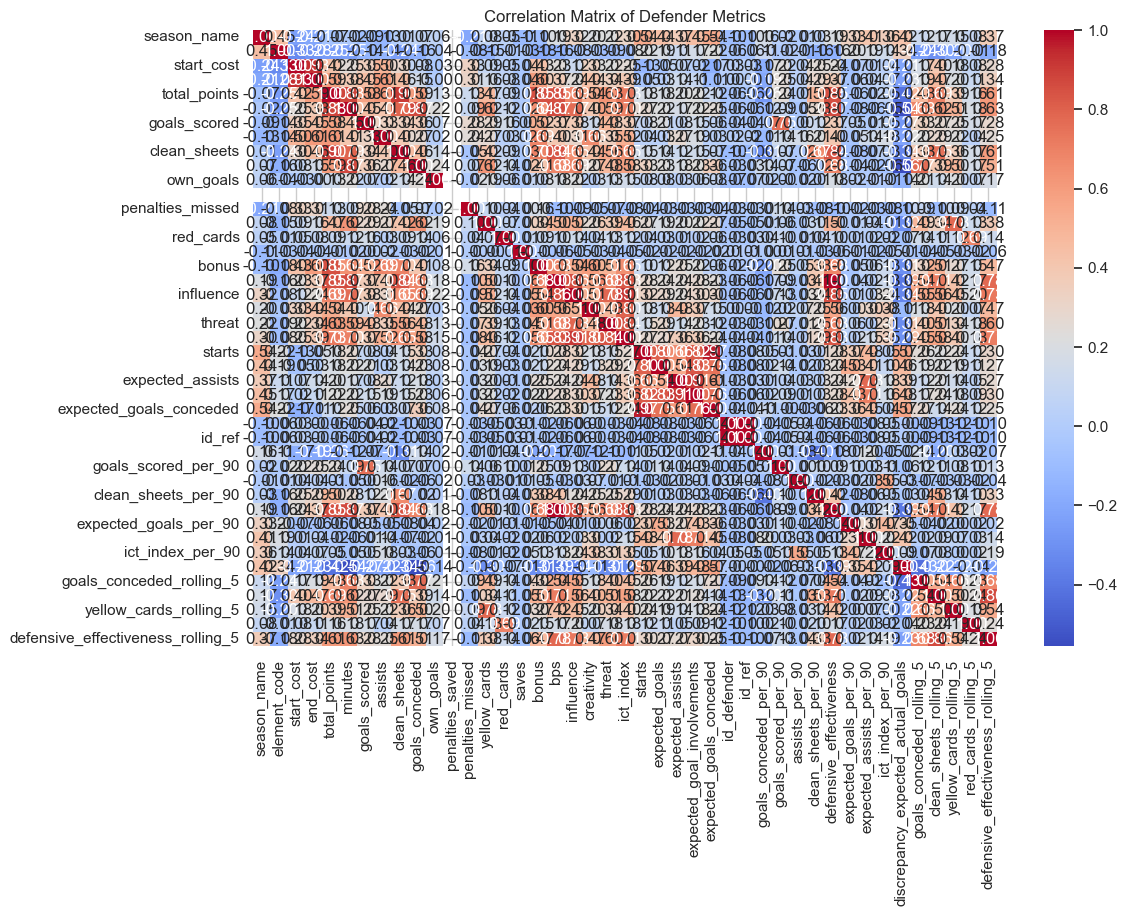

In [12]:
# Filter the DataFrame to include only numeric columns
numeric_df = defenders_df.select_dtypes(include=['number'])

# Correlation matrix to analyze relationships between features
correlation_matrix = numeric_df.corr()

# Plot the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix of Defender Metrics")
plt.show()

In [13]:
# Convert the correlation matrix to a DataFrame and reset the index
correlation_df = correlation_matrix.stack().reset_index()

# Rename columns for clarity
correlation_df.columns = ['Variable 1', 'Variable 2', 'Correlation']

# Remove self-correlations by filtering out rows where Variable 1 equals Variable 2
correlation_df = correlation_df[correlation_df['Variable 1'] != correlation_df['Variable 2']]

# Add a column for absolute correlation values for sorting
correlation_df['Abs_Correlation'] = correlation_df['Correlation'].abs()

# Sort the DataFrame by absolute correlation values in descending order to find the strongest correlations
strongest_correlations = correlation_df.sort_values(by='Abs_Correlation', ascending=False)

# Display the top 10 strongest correlations
print("Top 10 Strongest Correlations:")
print(strongest_correlations.head(10))

# Sort the DataFrame by correlation values to find the weakest correlations (closest to 0)
#weakest_correlations = correlation_df.sort_values(by='Abs_Correlation', ascending=True)

# Display the top 10 weakest correlations
#print("Top 10 Weakest Correlations:")
#print(weakest_correlations.head(10))

Top 10 Strongest Correlations:
                      Variable 1                  Variable 2  Correlation  \
1119                 id_defender                      id_ref     1.000000   
1160                      id_ref                 id_defender     1.000000   
704                          bps     defensive_effectiveness     0.999972   
1360     defensive_effectiveness                         bps     0.999972   
1071     expected_goals_conceded                      starts     0.966648   
907                       starts     expected_goals_conceded     0.966648   
128                     end_cost                  start_cost     0.933812   
87                    start_cost                    end_cost     0.933812   
990             expected_assists  expected_goal_involvements     0.913827   
1031  expected_goal_involvements            expected_assists     0.913827   

      Abs_Correlation  
1119         1.000000  
1160         1.000000  
704          0.999972  
1360         0.999972  
1

Insights
* Defensive Impact: Metrics like clean_sheets_per_90, goals_conceded_per_90, and defensive_effectiveness are likely good indicators of a defender's overall performance. These metrics can be used to create predictive models or analysis to identify top-performing defenders.
* Predicting Performance: High correlations between expected metrics (like expected_goals_conceded) and actual outcomes (goals_conceded) indicate that expected metrics can be useful predictors.

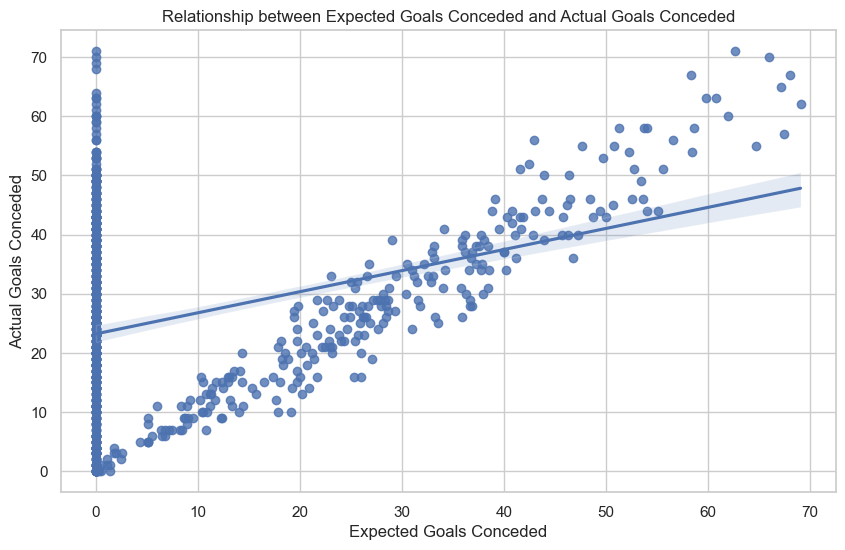

In [14]:
# FPL Predictictive Metrics
filtered_df = defenders_df.dropna(subset=['expected_goals_conceded', 'goals_conceded'])

# Scatter plot with a regression line
plt.figure(figsize=(10, 6))
sns.regplot(
    data=filtered_df,
    x='expected_goals_conceded',
    y='goals_conceded',
)

# Titles and labels
plt.title('Relationship between Expected Goals Conceded and Actual Goals Conceded')
plt.xlabel('Expected Goals Conceded')
plt.ylabel('Actual Goals Conceded')

# Show the plot
plt.show()

Expected metrics were derived by the FPL and are unique to that league play. The expected metrics were and not by me.

Analysis:
* Positive correlation: as the expected goals conceded increase, the actual goals conceded tend to increase as well.
* Spread: shows a moderate to strong correlation, which implies that expected metrics are somewhat accurate in predicting actual defensive performance
* Outliers: There is a noticeable cluster of points around zero on the x-axis (expected goals conceded) with varying actual goals conceded. These suggest that there are instances where the expected goals conceded model (an FPL metric) predicted zero, but the actual goals conceded were significantly higher. These could indicate match anomalies or the impact of random events (e.g., defensive mistakes). 

### Hypotheses
1. Hypothesis 1: Defenders with higher clean sheets per 90 minutes have a higher defensive effectiveness score.
2. Hypothesis 2: Expected goals conceded is a strong predictor of actual goals conceded.


### Valiadte Hypothesis 1: Evaluate Clean Sheets per 90 to Defensive Effectiveness

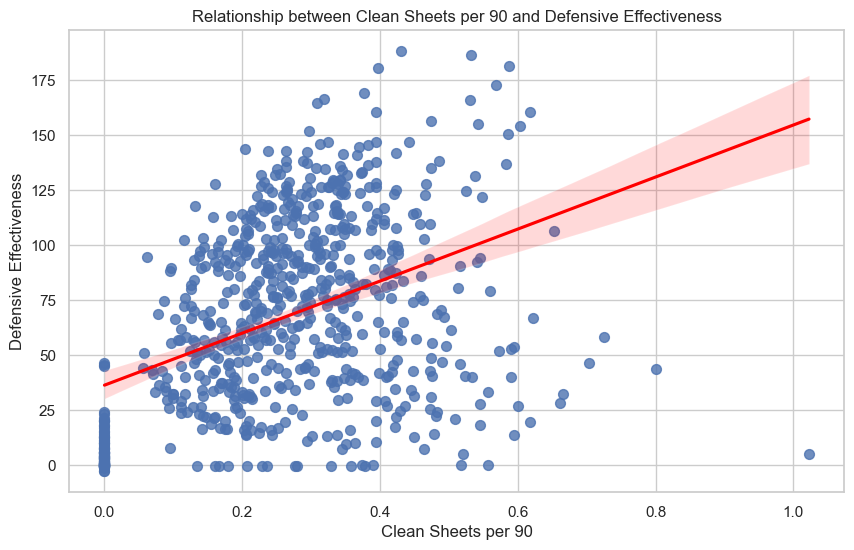

In [15]:
# Scatter Plot with Regression Line of the relationship
plt.figure(figsize=(10, 6))
sns.regplot(x='clean_sheets_per_90', y='defensive_effectiveness', data=defenders_df, scatter_kws={'s': 50}, line_kws={'color': 'red'})
plt.xlabel('Clean Sheets per 90')
plt.ylabel('Defensive Effectiveness')
plt.title('Relationship between Clean Sheets per 90 and Defensive Effectiveness')
plt.show()

### Obervation
* The regression line slopes upwards, which suggests that as the rate of clean sheets per 90 minutes increases, the defensive effectiveness score also tends to increase.  This makes sense; defenders who achieve more clean sheets per 90 minutes generally have higher defensive effectiveness scores, which indicates that this is a key metric of defensive performance.

### Fantasy Insight
* Prioritize players with low goals conceded and high number of clean sheets.

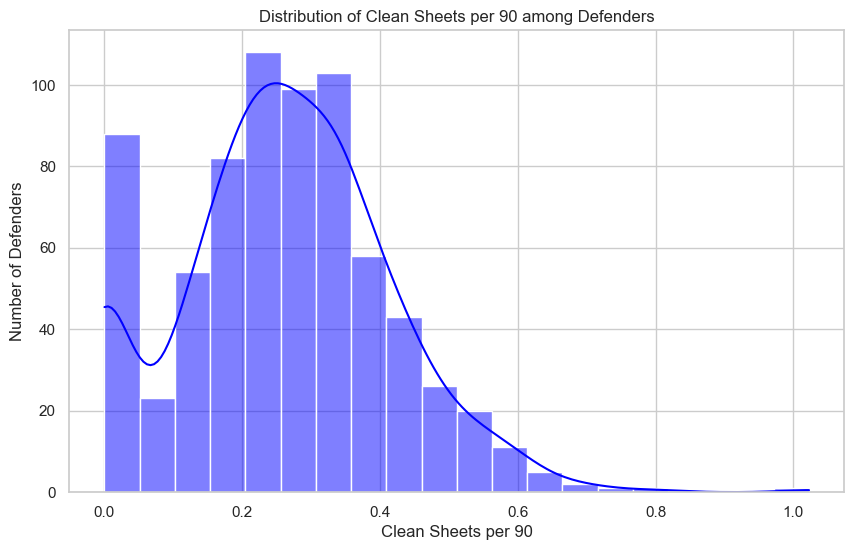

In [16]:
# Histogram of Clean Sheets per 90
plt.figure(figsize=(10, 6))
sns.histplot(defenders_df['clean_sheets_per_90'], kde=True, bins=20, color='blue')
plt.xlabel('Clean Sheets per 90')
plt.ylabel('Number of Defenders')
plt.title('Distribution of Clean Sheets per 90 among Defenders')
plt.show()

### Observations
* There's a right-skew in the distribution, with fewer defenders achieving higher clean sheets per 90 rates (above 0.6), indicating that it is rare for defenders to consistently keep clean sheets. The tailing off on the right suggests that only a select few defenders or teams can sustain a high clean sheet rate.
* The highest concentrations of defenders at souch low rates, indicates that achieving a clean sheet is very challenging. Some defenders' low or near-zero clean sheets per 90, suggests that perhaps not all defenders contribute equally to maintaining clean sheets (there can be many 'real world' factors that account for this).

### Fantasy Insight
* The right tail defenders, who maintain clean sheets consistently, should be highly sought after.

### Validate Hypothesis 2: Expected vs. Actual Goals Conceded
Measure discrepancies between expected and actual goals conceded.

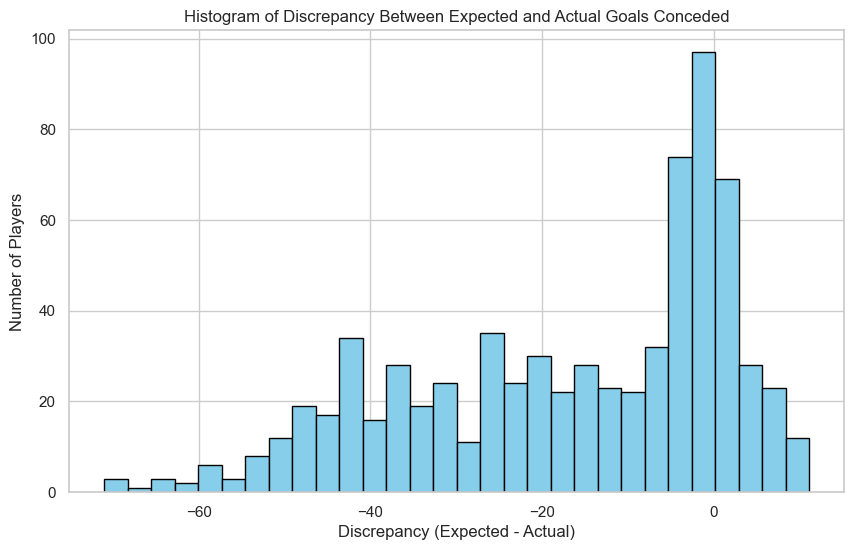

In [17]:
# Visualize the discrepancy
plt.figure(figsize=(10, 6))
plt.hist(defenders_df['discrepancy_expected_actual_goals'], bins=30, color='skyblue', edgecolor='black')
plt.title("Histogram of Discrepancy Between Expected and Actual Goals Conceded")
plt.xlabel("Discrepancy (Expected - Actual)")
plt.ylabel("Number of Players")
plt.show()

### Observations
* The highest bar is close to 0 on the x-axis, indicating that for many players, the actual number of goals conceded closely matches the expected number. This suggests that the expected goals conceded metric is generally a good predictor of actual performance.
* The distribution is skewed to the left, with a significant number of players showing negative discrepancies (i.e., expected goals conceded is greater than actual goals conceded). This indicates that these players performed better defensively than the metrics predicted (e.g., they conceded fewer goals than expected).

### Fantasy Insight
* Players who consistently outperform the expected goals conceded metric may be undervalued.

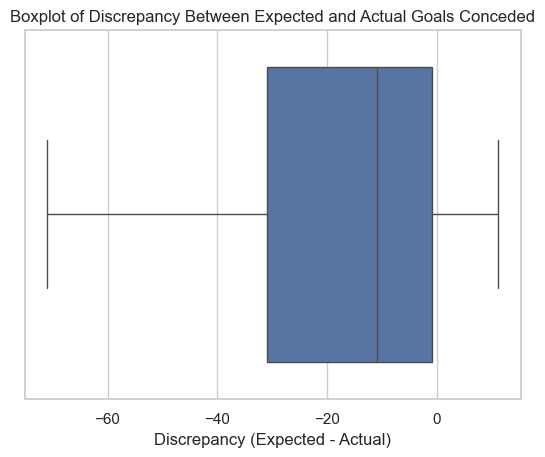

In [18]:
# Boxplot to analyze the distribution of the discrepancy
sns.boxplot(x=defenders_df['discrepancy_expected_actual_goals'])
plt.title("Boxplot of Discrepancy Between Expected and Actual Goals Conceded")
plt.xlabel("Discrepancy (Expected - Actual)")
plt.show()

### Obersvations
* The median line of the boxplot is around -10. This indicates that, on average, players tend to concede fewer goals than expected by about 10 goals.
* the IQR stretches from about -30 to 0, indicating that roughly a quarter of the defenders show discrepancies within this range.
* The whiskers extend to around -75 and 18, which tells us that while some players perform significantly better than expected, they should not exceed this range.

### Fantasy Insight
* Just the obvious...identify players that conceed fewer goals than expected.

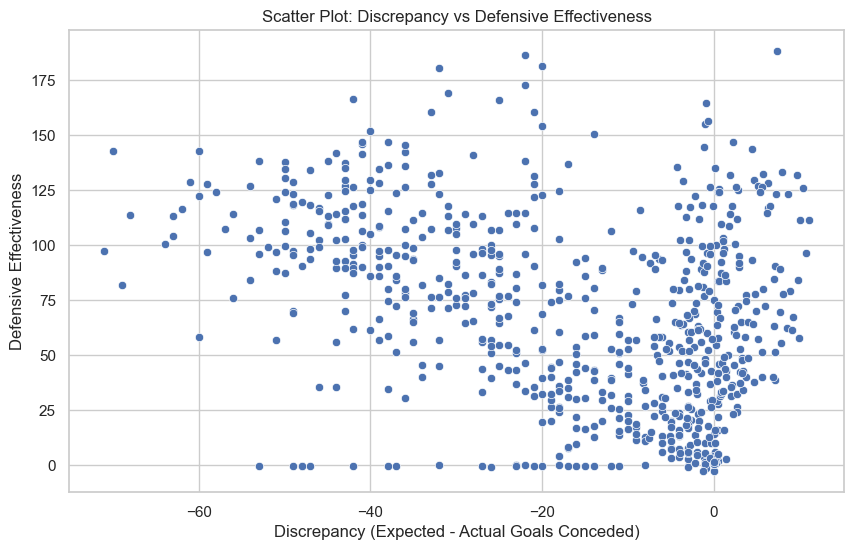

In [19]:
# Scatter plot to observe the relationship between discrepancy and defensive effectiveness
plt.figure(figsize=(10, 6))
sns.scatterplot(x='discrepancy_expected_actual_goals', y='defensive_effectiveness', data=defenders_df)
plt.title("Scatter Plot: Discrepancy vs Defensive Effectiveness")
plt.xlabel("Discrepancy (Expected - Actual Goals Conceded)")
plt.ylabel("Defensive Effectiveness")
plt.show()

### Observations
* There is significant variation among defenders in both their actual performance relative to expectations and their overall defensive contributions.
* Most of the data points cluster around the right side of the plot, where the discrepancy is closer to zero, suggesting that for many defenders, the expected goals conceded closely match the actual goals conceded.
* A small cluster of defenders show high defensive effectiveness (y-axis values above 100) regardless of the discrepancy. This suggests these defenders are consistently effective in their roles, contributing significantly to preventing goals.

### Fantasy Insights
* Target defenders with high negative discrepancies who also have high defensive effectiveness. These players outperform expectations by conceding fewer goals than expected and also contribute broadly to defensive metrics, which increases their fantasy value.

## Moving Averages

In [20]:
# Calculate Trends Based on Rolling Averages
if 'defensive_effectiveness_trend' not in defenders_df.columns:
    defenders_df['defensive_effectiveness_trend'] = defenders_df.groupby('element_code')['defensive_effectiveness_rolling_5'].diff()
if 'goals_conceded_trend' not in defenders_df.columns:
    defenders_df['goals_conceded_trend'] = defenders_df.groupby('element_code')['goals_conceded_rolling_5'].diff()
if 'clean_sheets_trend' not in defenders_df.columns:
    defenders_df['clean_sheets_trend'] = defenders_df.groupby('element_code')['clean_sheets_rolling_5'].diff()

# Aggregating Data to Ensure One Entry Per Player
aggregated_df = defenders_df.groupby('element_code').agg({
    'defensive_effectiveness_rolling_5': 'mean',
    'goals_conceded_rolling_5': 'mean',
    'clean_sheets_rolling_5': 'mean',
    'defensive_effectiveness_trend': 'mean',
    'goals_conceded_trend': 'mean',
    'clean_sheets_trend': 'mean',
    'first_name_ref': 'first',
    'second_name_ref': 'first'
}).reset_index()

# Calculating special score for aggregated data
print("Calculating special score for players...")
weights = {
    'defensive_effectiveness_rolling_5': 2,
    'goals_conceded_rolling_5': -1,
    'clean_sheets_rolling_5': 1,
    'defensive_effectiveness_trend': 1,
    'goals_conceded_trend': -0.5,
    'clean_sheets_trend': 0.5
}

aggregated_df['special_score'] = (
    weights['defensive_effectiveness_rolling_5'] * aggregated_df['defensive_effectiveness_rolling_5'] +
    weights['goals_conceded_rolling_5'] * aggregated_df['goals_conceded_rolling_5'] +
    weights['clean_sheets_rolling_5'] * aggregated_df['clean_sheets_rolling_5'] +
    weights['defensive_effectiveness_trend'] * aggregated_df['defensive_effectiveness_trend'] +
    weights['goals_conceded_trend'] * aggregated_df['goals_conceded_trend'] +
    weights['clean_sheets_trend'] * aggregated_df['clean_sheets_trend']
)
print("Special score calculated successfully.")

# Sort and create report if 'special_score' exists
top_players = aggregated_df.sort_values(by='special_score', ascending=False)
top_10_report = top_players[['element_code', 'special_score', 'first_name_ref', 'second_name_ref']].head(10)
print("Top 10 Players Based on Special Score:")
print(top_10_report)

Calculating special score for players...
Special score calculated successfully.
Top 10 Players Based on Special Score:
     element_code  special_score first_name_ref       second_name_ref
141        462424     258.090422        William                Saliba
58         171314     229.086033          Rúben       Gato Alves Dias
22          97032     226.999412         Virgil              van Dijk
75         198869     222.725582       Benjamin                 White
43         122798     221.297680         Andrew             Robertson
54         169187     212.917136          Trent      Alexander-Arnold
85         209036     207.618654           Marc                 Guéhi
110        226597     206.603178        Gabriel  dos Santos Magalhães
15          83299     205.546991          Lewis                  Dunk
25         101188     202.773753          Lucas                 Digne


Data found for player with element_code: 462424


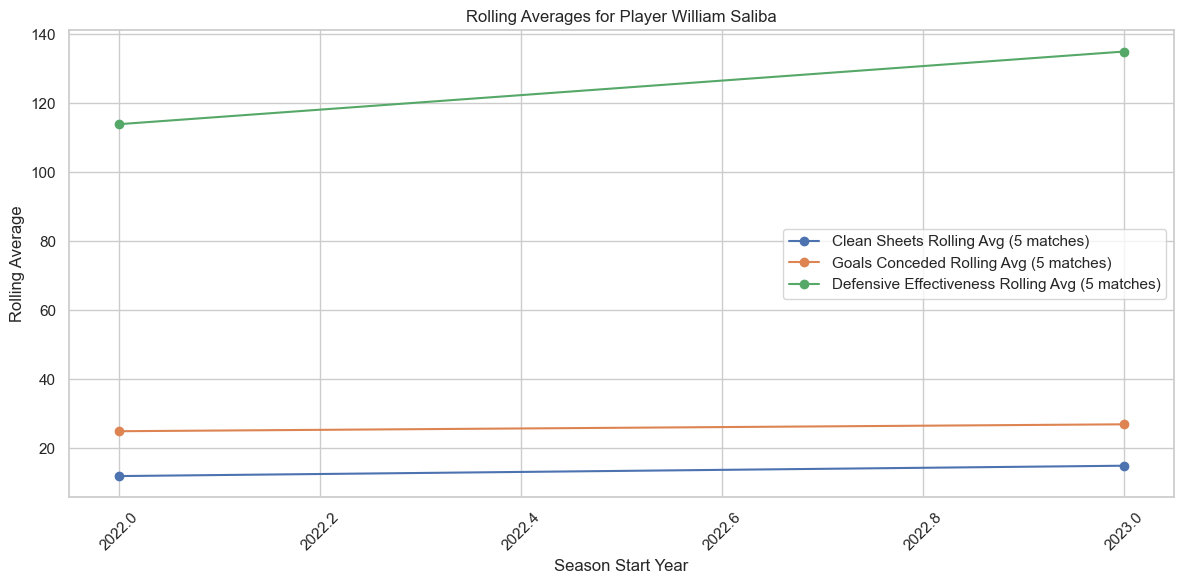

In [23]:
# Specify the element_code of the player to analyze
specific_player_element_code = 462424  # Example element_code

# Filter data for the specific player using the aggregated DataFrame
specific_player_data = defenders_df[defenders_df['element_code'] == specific_player_element_code]

# Check if any data exists for the player
if specific_player_data.empty:
    print(f"No data found for player with element_code: {specific_player_element_code}")
else:
    print(f"Data found for player with element_code: {specific_player_element_code}")

    # Plotting rolling averages
    plt.figure(figsize=(12, 6))

    # Plot Clean Sheets Rolling Average
    plt.plot(specific_player_data['season_name'], specific_player_data['clean_sheets_rolling_5'], label='Clean Sheets Rolling Avg (5 matches)', marker='o')

    # Plot Goals Conceded Rolling Average
    plt.plot(specific_player_data['season_name'], specific_player_data['goals_conceded_rolling_5'], label='Goals Conceded Rolling Avg (5 matches)', marker='o')

    # Plot Defensive Effectiveness Rolling Average
    plt.plot(specific_player_data['season_name'], specific_player_data['defensive_effectiveness_rolling_5'], label='Defensive Effectiveness Rolling Avg (5 matches)', marker='o')

    # Plot Labels and Title
    plt.xlabel('Season Start Year')
    plt.ylabel('Rolling Average')
    plt.title(f'Rolling Averages for Player {specific_player_data["first_name_ref"].iloc[0]} {specific_player_data["second_name_ref"].iloc[0]}')
    plt.legend()
    plt.xticks(rotation=45)
    plt.tight_layout()

    # Display the plot
    plt.show()


1. Clean Sheets Rolling Average: This shows how the frequency of clean sheets is changing over time.
2. Goals Conceded Rolling Average: This illustrates trends in defensive stability.
3. Defensive Effectivness Rolling Average: This is useful in understanding a player's consistency and form.

In [22]:
# Saving the results to use in other notebooks
defenders_df.to_csv('../data/processed/defenders_features.csv', index=False)